# OBTANING DATA


## Basic Imports

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns
%matplotlib inline

import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.cluster import DBSCAN
import sklearn.preprocessing as preprocessing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [90]:
df = pd.read_csv('data/kc_house_data.csv', index_col = 'id')

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## SCRUBING DATA

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [91]:
df.shape

(21597, 20)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

### Must deal with object values and missing values 

In [93]:
for col in df.columns:
    print('=============================')
    print('Looking at column', col)
    print(df[col].value_counts(normalize=True))

Looking at column date
6/23/2014     0.006575
6/26/2014     0.006066
6/25/2014     0.006066
7/8/2014      0.005880
4/27/2015     0.005834
                ...   
11/30/2014    0.000046
11/2/2014     0.000046
8/3/2014      0.000046
1/10/2015     0.000046
2/15/2015     0.000046
Name: date, Length: 372, dtype: float64
Looking at column price
350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
              ...   
870515.0    0.000046
336950.0    0.000046
386100.0    0.000046
176250.0    0.000046
884744.0    0.000046
Name: price, Length: 3622, dtype: float64
Looking at column bedrooms
3     0.454878
4     0.318655
2     0.127796
5     0.074131
6     0.012594
1     0.009075
7     0.001760
8     0.000602
9     0.000278
10    0.000139
11    0.000046
33    0.000046
Name: bedrooms, dtype: float64
Looking at column bathrooms
2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
1.50    0.066907
2.75    0.054869
3.

In [94]:
date = pd.to_datetime(df['date'])
date = date.sort_values()
date.iloc[0], date.iloc[-1]

(Timestamp('2014-05-02 00:00:00'), Timestamp('2015-05-27 00:00:00'))

In [95]:
df[df.bedrooms == 33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [96]:
df.drop(index =2402100895, inplace=True)

In [97]:
df.shape

(21596, 20)

# EXPLORATORY PHASE 

In [98]:
df[df.bedrooms == 33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,


In [99]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [100]:
df.duplicated()

id
7129300520    False
6414100192    False
5631500400    False
2487200875    False
1954400510    False
              ...  
263000018     False
6600060120    False
1523300141    False
291310100     False
1523300157    False
Length: 21596, dtype: bool

In [101]:
df.duplicated().sum()

0

In [102]:
df.index.duplicated().sum()

177

In [103]:
df[df.index.duplicated(keep=False)].head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,3,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,3,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,3,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,3,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,3,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460


## Same house was sold twice in the span of one year - we will remove the first value

In [104]:
df = df[~df.index.duplicated(keep='last')].copy()

In [105]:
df.shape

(21419, 20)

In [106]:
df.waterfront.value_counts()

0.0    18920
1.0      146
Name: waterfront, dtype: int64

<AxesSubplot:xlabel='long', ylabel='lat'>

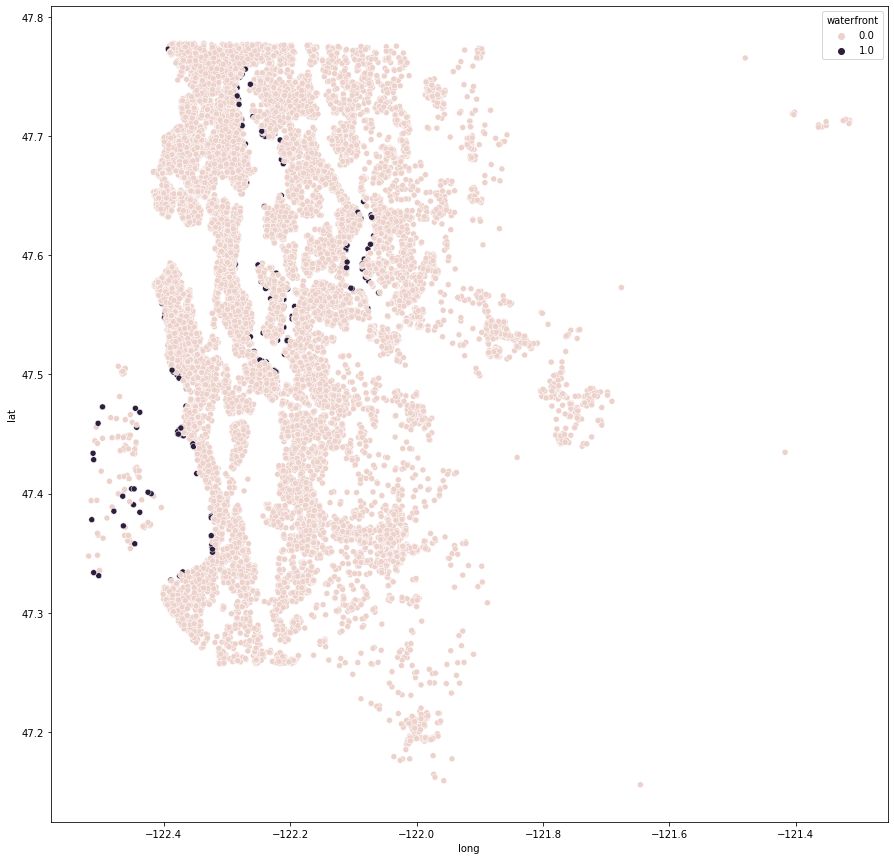

In [107]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='long',y='lat',data=df,hue='waterfront')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

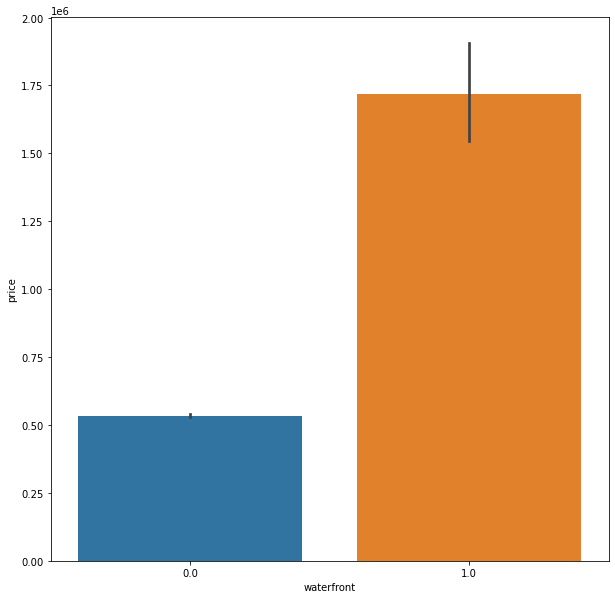

In [108]:
plt.figure(figsize=(10,10))
sns.barplot(x='waterfront',y='price',data=df)

In [109]:
df.yr_renovated.median()

0.0

In [110]:
df.groupby(by='yr_renovated').median()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
yr_renovated,,,,,,,,,,,,,,,,,
0.0,449950.0,3.0,2.25,1910.0,7609.0,1.50,0.0,0.0,3.0,7.0,1560.0,1977.0,98065.0,47.56970,-122.2250,1850.0,7620.0
1934.0,459950.0,3.0,1.75,1850.0,6869.0,1.00,0.0,2.0,5.0,6.0,1100.0,1919.0,98166.0,47.46480,-122.3630,1850.0,10096.0
1940.0,378400.0,2.0,1.00,1150.0,4470.0,1.00,0.0,0.0,3.5,6.5,950.0,1915.0,98115.5,47.62780,-122.3600,1295.0,5500.0
1944.0,521000.0,3.0,2.00,1840.0,6000.0,1.00,0.0,0.0,4.0,6.0,1840.0,1908.0,98136.0,47.55080,-122.3920,2010.0,6000.0
1945.0,375000.0,2.0,1.75,1330.0,6000.0,1.00,0.0,0.0,3.0,6.0,960.0,1914.0,98146.0,47.65390,-122.3560,1620.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011.0,507000.0,3.0,2.50,1600.0,4879.0,1.00,0.0,0.0,3.0,7.0,1260.0,1942.0,98109.0,47.57030,-122.3650,1600.0,5000.0
2012.0,568750.0,3.0,2.25,1520.0,6625.0,1.25,0.0,0.0,3.0,8.0,1341.5,1940.5,98095.5,47.57685,-122.2925,1580.0,6622.0
2013.0,570000.0,4.0,2.25,2060.0,6825.0,1.00,0.0,0.0,3.0,7.0,1420.0,1943.0,98122.0,47.59960,-122.3490,1590.0,6561.0


In [111]:
df.yr_renovated.nunique()

70

In [112]:
df['has_renovated'] = df.yr_renovated.map(lambda x: 1 if x > 2000 else 0)
df.has_renovated.value_counts()

0    21069
1      350
Name: has_renovated, dtype: int64

<AxesSubplot:xlabel='has_renovated', ylabel='price'>

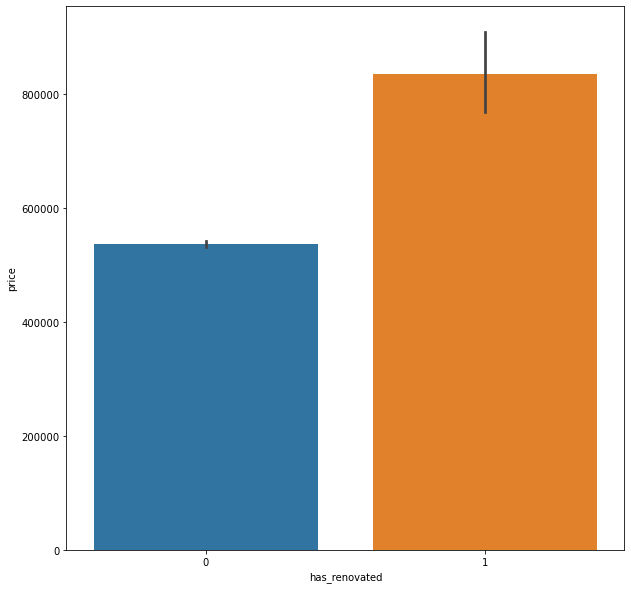

In [113]:
plt.figure(figsize=(10,10))
sns.barplot(x='has_renovated',y='price',data=df)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 7129300520 to 1523300157
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21419 non-null  object 
 1   price          21419 non-null  float64
 2   bedrooms       21419 non-null  int64  
 3   bathrooms      21419 non-null  float64
 4   sqft_living    21419 non-null  int64  
 5   sqft_lot       21419 non-null  int64  
 6   floors         21419 non-null  float64
 7   waterfront     19066 non-null  float64
 8   view           21356 non-null  float64
 9   condition      21419 non-null  int64  
 10  grade          21419 non-null  int64  
 11  sqft_above     21419 non-null  int64  
 12  sqft_basement  21419 non-null  object 
 13  yr_built       21419 non-null  int64  
 14  yr_renovated   17606 non-null  float64
 15  zipcode        21419 non-null  int64  
 16  lat            21419 non-null  float64
 17  long           21419 non-null  float

In [115]:
df.date = pd.to_datetime(df['date']).dt.month

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 7129300520 to 1523300157
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21419 non-null  int64  
 1   price          21419 non-null  float64
 2   bedrooms       21419 non-null  int64  
 3   bathrooms      21419 non-null  float64
 4   sqft_living    21419 non-null  int64  
 5   sqft_lot       21419 non-null  int64  
 6   floors         21419 non-null  float64
 7   waterfront     19066 non-null  float64
 8   view           21356 non-null  float64
 9   condition      21419 non-null  int64  
 10  grade          21419 non-null  int64  
 11  sqft_above     21419 non-null  int64  
 12  sqft_basement  21419 non-null  object 
 13  yr_built       21419 non-null  int64  
 14  yr_renovated   17606 non-null  float64
 15  zipcode        21419 non-null  int64  
 16  lat            21419 non-null  float64
 17  long           21419 non-null  float

In [117]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3813
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
has_renovated       0
dtype: int64

In [118]:
df.waterfront.value_counts(normalize=True)

0.0    0.992342
1.0    0.007658
Name: waterfront, dtype: float64

In [119]:
df.view.value_counts(normalize=True)

0.0    0.901480
2.0    0.044765
3.0    0.023647
1.0    0.015406
4.0    0.014703
Name: view, dtype: float64

In [120]:
df['yr_renovated'].value_counts(normalize=True).head()

0.0       0.957969
2014.0    0.004146
2003.0    0.001761
2013.0    0.001761
2007.0    0.001704
Name: yr_renovated, dtype: float64

### We will replace the missing values with the median 

In [121]:
print(df['yr_renovated'].median())
print(df['view'].median())
print(df['waterfront'].median())

0.0
0.0
0.0


In [122]:
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [123]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
has_renovated    0
dtype: int64

In [124]:
df.shape

(21419, 21)

In [125]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_renovated
id,,,,,,,,,,,,,,,,,,,,,
7129300520,10,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
6414100192,12,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0
5631500400,2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
2487200875,12,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
1954400510,2,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 7129300520 to 1523300157
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21419 non-null  int64  
 1   price          21419 non-null  float64
 2   bedrooms       21419 non-null  int64  
 3   bathrooms      21419 non-null  float64
 4   sqft_living    21419 non-null  int64  
 5   sqft_lot       21419 non-null  int64  
 6   floors         21419 non-null  float64
 7   waterfront     21419 non-null  float64
 8   view           21419 non-null  float64
 9   condition      21419 non-null  int64  
 10  grade          21419 non-null  int64  
 11  sqft_above     21419 non-null  int64  
 12  sqft_basement  21419 non-null  object 
 13  yr_built       21419 non-null  int64  
 14  yr_renovated   21419 non-null  float64
 15  zipcode        21419 non-null  int64  
 16  lat            21419 non-null  float64
 17  long           21419 non-null  float

## Now we deal with sqft_basement

In [127]:
df.sqft_basement.value_counts(normalize=True)

0.0       0.593679
?         0.021103
600.0     0.010085
500.0     0.009618
700.0     0.009618
            ...   
768.0     0.000047
2130.0    0.000047
20.0      0.000047
906.0     0.000047
283.0     0.000047
Name: sqft_basement, Length: 304, dtype: float64

In [128]:
df['sqft_basement'] = df.apply(lambda x: x['sqft_living'] 
                                 - x['sqft_above'] if x['sqft_basement'] 
                                 == '?' else x['sqft_basement'], axis = 1)
df['sqft_basement'] = df['sqft_basement'].astype(float).astype(int)

In [129]:
df.sqft_basement.value_counts(normalize=True)

0       0.606891
600     0.010271
700     0.010038
500     0.009851
800     0.009618
          ...   
1816    0.000047
792     0.000047
2590    0.000047
935     0.000047
248     0.000047
Name: sqft_basement, Length: 306, dtype: float64

In [130]:
df.index.duplicated().sum()

0

<AxesSubplot:xlabel='date', ylabel='price'>

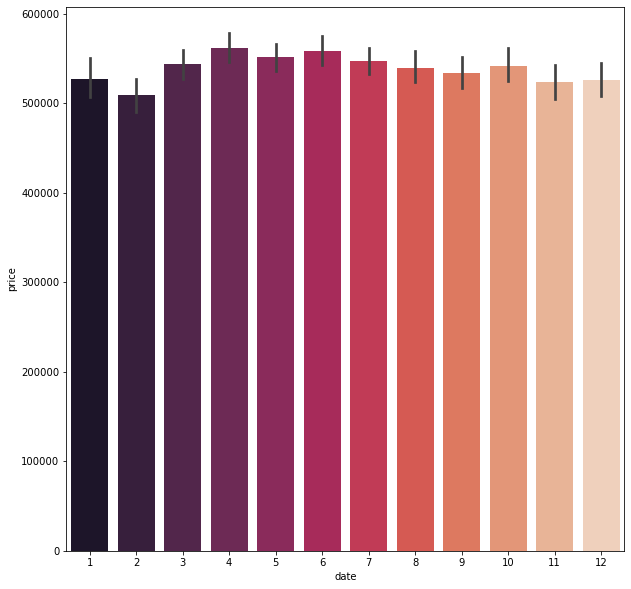

In [131]:
plt.figure(figsize=(10,10))
sns.barplot(x='date',y='price',data=df, palette='rocket')

## The price for house does not severly fluctuated throughout the year - we might drop from model

<AxesSubplot:>

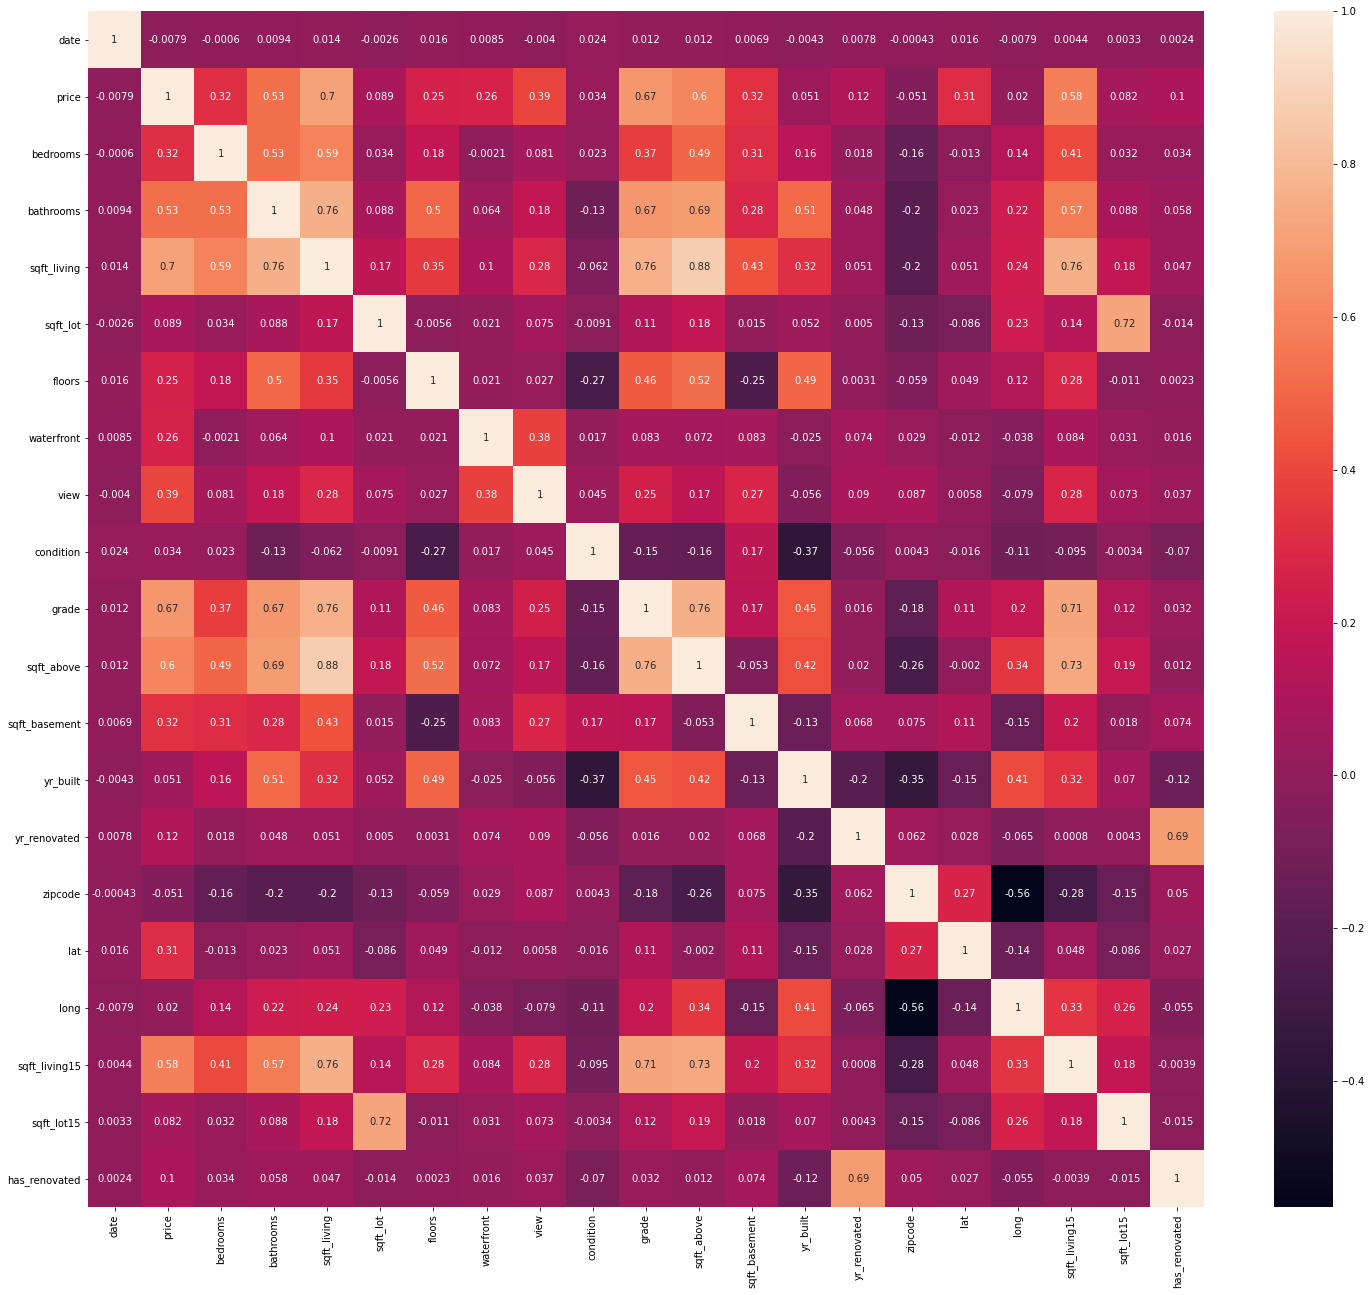

In [132]:
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(),annot=True)

## Multicollinearity variables: 
sqft_living & sqft_above: will drop *sqft_above*

has_renovated & yr_renovated: will drop *yr_renovated*

sqft_living15 & sqft_lot15: will drop **both**

In [133]:
df.drop(columns=['sqft_above','yr_renovated','sqft_living15','date','sqft_lot15'],inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,has_renovated
id,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,0,1955,98178,47.5112,-122.257,0
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,400,1951,98125,47.7210,-122.319,0
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,0,1933,98028,47.7379,-122.233,0
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,910,1965,98136,47.5208,-122.393,0
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,0,1987,98074,47.6168,-122.045,0


In [134]:
df.shape

(21419, 16)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 7129300520 to 1523300157
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21419 non-null  float64
 1   bedrooms       21419 non-null  int64  
 2   bathrooms      21419 non-null  float64
 3   sqft_living    21419 non-null  int64  
 4   sqft_lot       21419 non-null  int64  
 5   floors         21419 non-null  float64
 6   waterfront     21419 non-null  float64
 7   view           21419 non-null  float64
 8   condition      21419 non-null  int64  
 9   grade          21419 non-null  int64  
 10  sqft_basement  21419 non-null  int64  
 11  yr_built       21419 non-null  int64  
 12  zipcode        21419 non-null  int64  
 13  lat            21419 non-null  float64
 14  long           21419 non-null  float64
 15  has_renovated  21419 non-null  int64  
dtypes: float64(7), int64(9)
memory usage: 3.4 MB


## Defining categorical and continiuos variables 

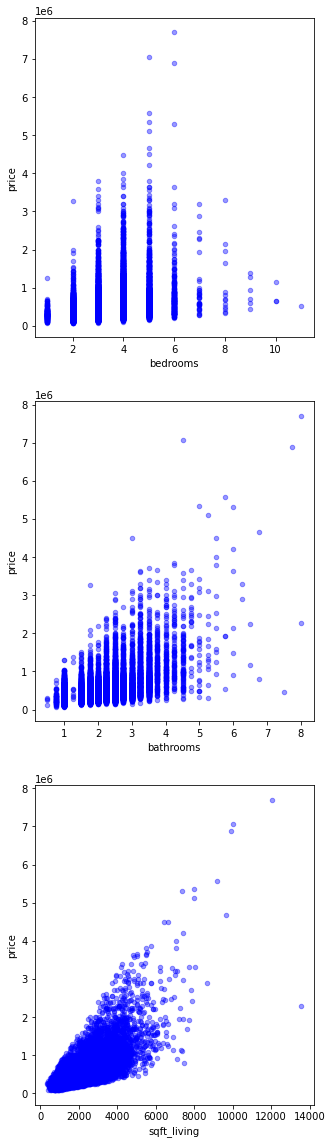

In [136]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5,20))

for xcol, ax in zip(['bedrooms','bathrooms','sqft_living'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

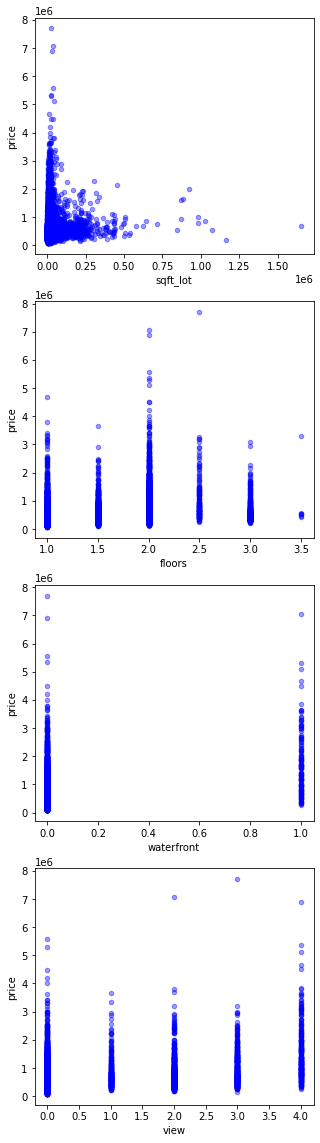

In [137]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(5,20))

for xcol, ax in zip(['sqft_lot','floors','waterfront','view',], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

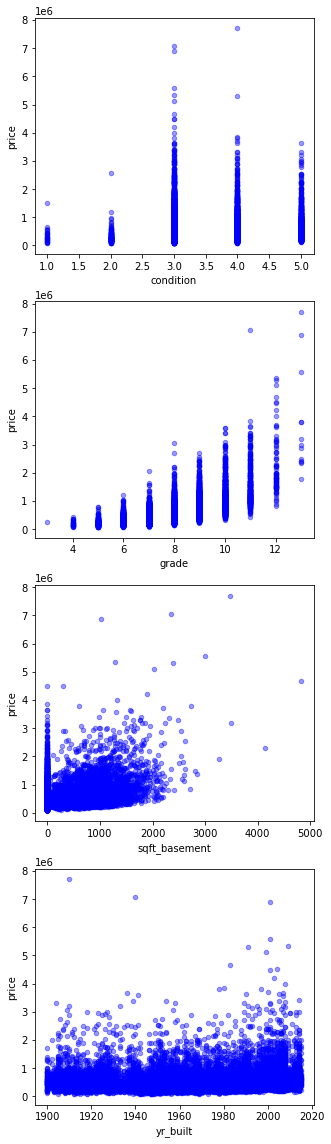

In [138]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(5,20))

for xcol, ax in zip(['condition','grade','sqft_basement','yr_built'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

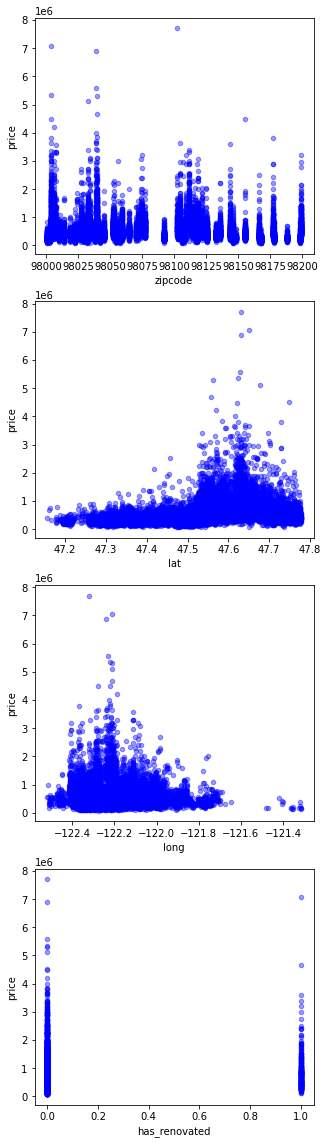

In [139]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(5,20))

for xcol, ax in zip(['zipcode','lat','long','has_renovated'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

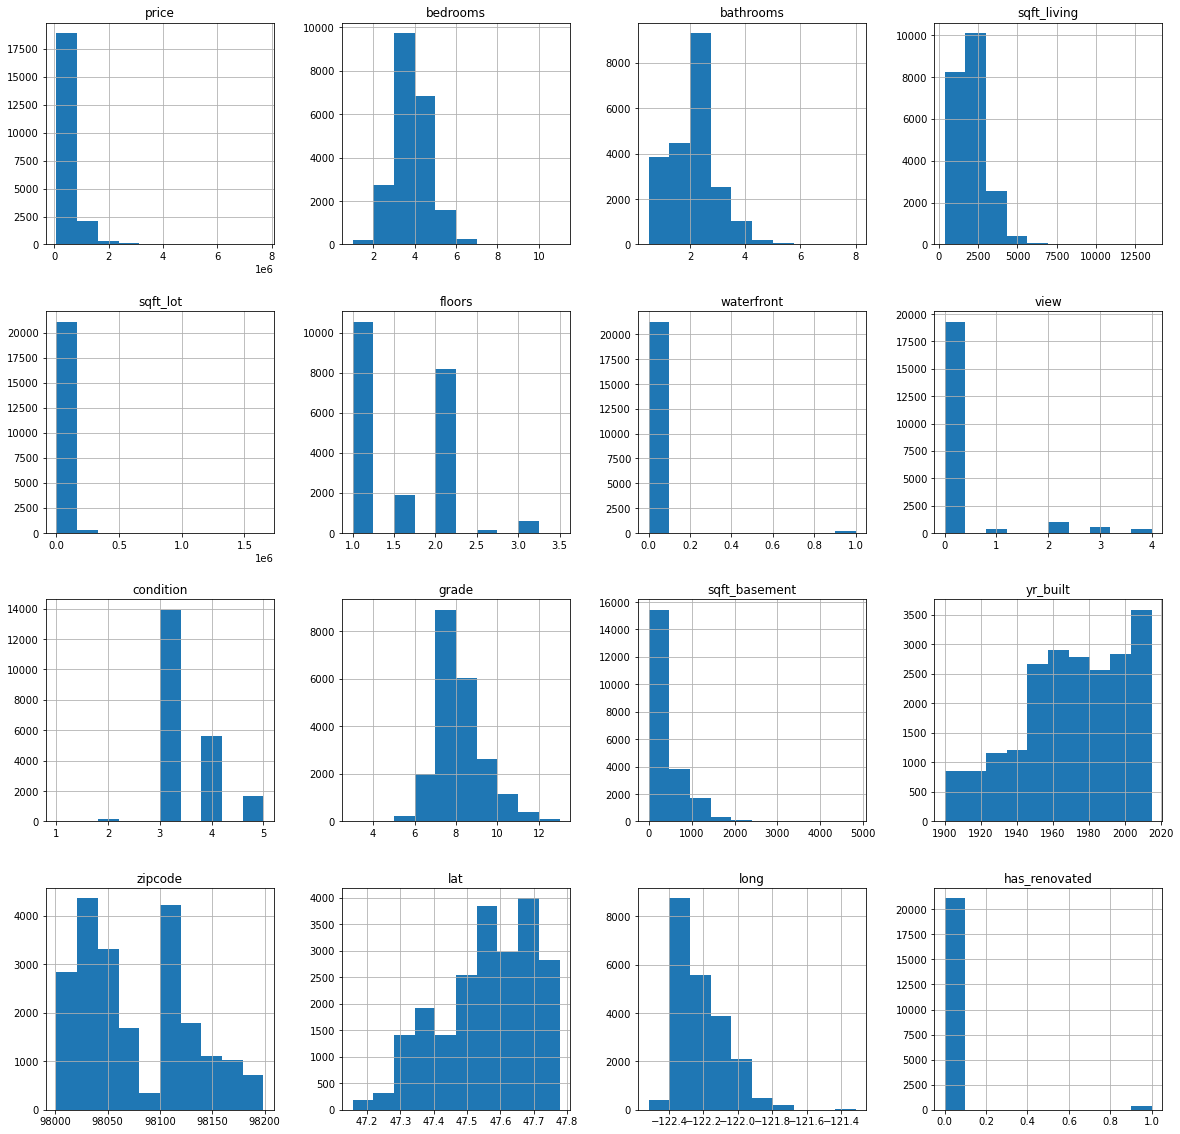

In [140]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax);

# CATEGORICALS:

'bedrooms','bathroom','floors','waterfront','view','condition','grade','yr_built','zipcode','has_renovated'

### bedrooms

In [141]:
df.bedrooms.value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

### We will drop the data for houses with 7 or more bedroom as they are outliers

In [179]:
df = df[df['bedrooms'] < 7]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20747 entries, 7129300520 to 291310100
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          20747 non-null  float64 
 1   bedrooms       20747 non-null  int64   
 2   bathrooms      20747 non-null  float64 
 3   sqft_living    20747 non-null  int64   
 4   sqft_lot       20747 non-null  int64   
 5   floors         20747 non-null  float64 
 6   waterfront     20747 non-null  float64 
 7   view           20747 non-null  float64 
 8   condition      20747 non-null  int64   
 9   grade          20747 non-null  int64   
 10  sqft_basement  20747 non-null  int64   
 11  yr_built       20747 non-null  int64   
 12  zipcode        20747 non-null  int64   
 13  lat            20747 non-null  float64 
 14  long           20747 non-null  float64 
 15  has_renovated  20747 non-null  int64   
 16  grade_bins     20548 non-null  category
 17  yr_bins        206

In [180]:
df.bedrooms.value_counts()

3    9574
4    6690
2    2632
5    1492
6     213
1     146
Name: bedrooms, dtype: int64

In [181]:
bedroom_dummies = pd.get_dummies(df.bedrooms, prefix='bedrooms', drop_first=True)
bedroom_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20747 entries, 7129300520 to 291310100
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   bedrooms_2  20747 non-null  uint8
 1   bedrooms_3  20747 non-null  uint8
 2   bedrooms_4  20747 non-null  uint8
 3   bedrooms_5  20747 non-null  uint8
 4   bedrooms_6  20747 non-null  uint8
dtypes: uint8(5)
memory usage: 263.4 KB


### bathrooms

In [182]:
df.bathrooms.value_counts()

2.50    5293
1.00    3681
1.75    2986
2.25    2008
2.00    1878
1.50    1405
2.75    1165
3.00     712
3.50     710
3.25     571
3.75     145
4.00     121
4.25      72
Name: bathrooms, dtype: int64

In [183]:
df = df[df['bathrooms'] < 4.5]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20747 entries, 7129300520 to 291310100
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          20747 non-null  float64 
 1   bedrooms       20747 non-null  int64   
 2   bathrooms      20747 non-null  float64 
 3   sqft_living    20747 non-null  int64   
 4   sqft_lot       20747 non-null  int64   
 5   floors         20747 non-null  float64 
 6   waterfront     20747 non-null  float64 
 7   view           20747 non-null  float64 
 8   condition      20747 non-null  int64   
 9   grade          20747 non-null  int64   
 10  sqft_basement  20747 non-null  int64   
 11  yr_built       20747 non-null  int64   
 12  zipcode        20747 non-null  int64   
 13  lat            20747 non-null  float64 
 14  long           20747 non-null  float64 
 15  has_renovated  20747 non-null  int64   
 16  grade_bins     20548 non-null  category
 17  yr_bins        206

In [184]:
df.bathrooms.value_counts()

2.50    5293
1.00    3681
1.75    2986
2.25    2008
2.00    1878
1.50    1405
2.75    1165
3.00     712
3.50     710
3.25     571
3.75     145
4.00     121
4.25      72
Name: bathrooms, dtype: int64

In [185]:
df = df[df['bathrooms'] > .99]
df.bathrooms.value_counts()

2.50    5293
1.00    3681
1.75    2986
2.25    2008
2.00    1878
1.50    1405
2.75    1165
3.00     712
3.50     710
3.25     571
3.75     145
4.00     121
4.25      72
Name: bathrooms, dtype: int64

In [186]:
df = df[df.bathrooms != 1.25]

In [187]:
df.bathrooms.value_counts()

2.50    5293
1.00    3681
1.75    2986
2.25    2008
2.00    1878
1.50    1405
2.75    1165
3.00     712
3.50     710
3.25     571
3.75     145
4.00     121
4.25      72
Name: bathrooms, dtype: int64

In [188]:
bathroom_dummies = pd.get_dummies(data=df.bathrooms, prefix='bathrooms',drop_first=True)
bathroom_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20747 entries, 7129300520 to 291310100
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   bathrooms_1.5   20747 non-null  uint8
 1   bathrooms_1.75  20747 non-null  uint8
 2   bathrooms_2.0   20747 non-null  uint8
 3   bathrooms_2.25  20747 non-null  uint8
 4   bathrooms_2.5   20747 non-null  uint8
 5   bathrooms_2.75  20747 non-null  uint8
 6   bathrooms_3.0   20747 non-null  uint8
 7   bathrooms_3.25  20747 non-null  uint8
 8   bathrooms_3.5   20747 non-null  uint8
 9   bathrooms_3.75  20747 non-null  uint8
 10  bathrooms_4.0   20747 non-null  uint8
 11  bathrooms_4.25  20747 non-null  uint8
dtypes: uint8(12)
memory usage: 405.2 KB


### Floors

In [189]:
df.floors.value_counts()

1.0    10299
2.0     8002
1.5     1849
3.0      597
Name: floors, dtype: int64

In [190]:
df = df[df.floors != 3.5]

In [191]:
df.floors.value_counts()

1.0    10299
2.0     8002
1.5     1849
3.0      597
Name: floors, dtype: int64

In [193]:
df.floors.value_counts(normalize=True)

1.0    0.496409
2.0    0.385694
1.5    0.089121
3.0    0.028775
Name: floors, dtype: float64

In [194]:
df = df[df.floors != 2.5]

In [195]:
floor_dummies = pd.get_dummies(data=df.floors, prefix='floors',drop_first=True)
floor_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20747 entries, 7129300520 to 291310100
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   floors_1.5  20747 non-null  uint8
 1   floors_2.0  20747 non-null  uint8
 2   floors_3.0  20747 non-null  uint8
dtypes: uint8(3)
memory usage: 222.9 KB


### waterfront

In [196]:
df.waterfront.value_counts()

0.0    20625
1.0      122
Name: waterfront, dtype: int64

In [197]:
waterfront_dummies = pd.get_dummies(data=df.waterfront, prefix='waterfront', drop_first=True)
waterfront_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20747 entries, 7129300520 to 291310100
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   waterfront_1.0  20747 non-null  uint8
dtypes: uint8(1)
memory usage: 182.3 KB


In [198]:
df.view.value_counts()

0.0    18774
2.0      904
3.0      473
1.0      319
4.0      277
Name: view, dtype: int64

In [199]:
view_dummies = pd.get_dummies(data=df.view, prefix='view',drop_first=True)
view_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20747 entries, 7129300520 to 291310100
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   view_1.0  20747 non-null  uint8
 1   view_2.0  20747 non-null  uint8
 2   view_3.0  20747 non-null  uint8
 3   view_4.0  20747 non-null  uint8
dtypes: uint8(4)
memory usage: 243.1 KB


In [200]:
df.condition.value_counts()

3    13562
4     5538
5     1647
Name: condition, dtype: int64

In [201]:
df = df[df['condition'] > 2]
df.condition.value_counts()

3    13562
4     5538
5     1647
Name: condition, dtype: int64

In [202]:
condition_dummies = pd.get_dummies(data=df.condition, prefix='condition',drop_first=True)
condition_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20747 entries, 7129300520 to 291310100
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   condition_4  20747 non-null  uint8
 1   condition_5  20747 non-null  uint8
dtypes: uint8(2)
memory usage: 202.6 KB


In [203]:
df.grade.value_counts()

7     8741
8     5932
9     2533
6     1899
10    1060
11     323
5      199
12      60
Name: grade, dtype: int64

In [204]:
df = df[(df.grade > 4) & (df.grade <13)]
df.grade.value_counts()

7     8741
8     5932
9     2533
6     1899
10    1060
11     323
5      199
12      60
Name: grade, dtype: int64

In [167]:
df['grade_bins'] = pd.cut(df.grade, bins = (5,6,7,9,12),labels=['dropped','fair','good','excellent'])
df.grade_bins.value_counts()

fair         8741
good         8465
dropped      1899
excellent    1443
Name: grade_bins, dtype: int64

In [205]:
grade_dummies = pd.get_dummies(df.grade_bins, prefix='grade',drop_first=True)
grade_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20747 entries, 7129300520 to 291310100
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   grade_fair       20747 non-null  uint8
 1   grade_good       20747 non-null  uint8
 2   grade_excellent  20747 non-null  uint8
dtypes: uint8(3)
memory usage: 222.9 KB


In [206]:
df.has_renovated.value_counts()

0    20415
1      332
Name: has_renovated, dtype: int64

In [207]:
renovated_dummies = pd.get_dummies(data = df.has_renovated, prefix='has_renovated', drop_first=True)
renovated_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20747 entries, 7129300520 to 291310100
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   has_renovated_1  20747 non-null  uint8
dtypes: uint8(1)
memory usage: 182.3 KB


In [209]:
df['yr_bins'] = pd.cut(df.yr_built, bins = (1900,1925,1950,1975,2000,2015),
                              labels=['dropped','early_century','mid_century','modern','post_modern'])
df.yr_bins.value_counts()

modern           5961
mid_century      5574
post_modern      4365
early_century    2901
dropped          1869
Name: yr_bins, dtype: int64

In [211]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,has_renovated,grade_bins,yr_bins
id,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,0,1955,98178,47.5112,-122.257,0,fair,mid_century
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,400,1951,98125,47.7210,-122.319,0,fair,mid_century
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,0,1933,98028,47.7379,-122.233,0,dropped,early_century
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,910,1965,98136,47.5208,-122.393,0,fair,mid_century
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,0,1987,98074,47.6168,-122.045,0,good,modern
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7936000429,1010000.0,4,3.50,3510,7200,2.0,0.0,0.0,3,9,910,2009,98136,47.5537,-122.398,0,good,post_modern
2997800021,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,3,8,130,2008,98116,47.5773,-122.409,0,good,post_modern
263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,0,2009,98103,47.6993,-122.346,0,good,post_modern


In [212]:
yr_dummies = pd.get_dummies(data = df.yr_bins, prefix='yr_built',drop_first=True)
yr_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20747 entries, 7129300520 to 291310100
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   yr_built_early_century  20747 non-null  uint8
 1   yr_built_mid_century    20747 non-null  uint8
 2   yr_built_modern         20747 non-null  uint8
 3   yr_built_post_modern    20747 non-null  uint8
dtypes: uint8(4)
memory usage: 243.1 KB


In [213]:
print(df.shape)
print(bedroom_dummies.shape)
print(bathroom_dummies.shape)
print(floor_dummies.shape)
print(waterfront_dummies.shape)
print(view_dummies.shape)
print(condition_dummies.shape)
print(grade_dummies.shape)
print(yr_dummies.shape)
print(renovated_dummies.shape)

(20747, 18)
(20747, 5)
(20747, 12)
(20747, 3)
(20747, 1)
(20747, 4)
(20747, 2)
(20747, 3)
(20747, 4)
(20747, 1)


In [214]:
df2 = df.drop(columns=['bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_built','has_renovated','grade_bins','yr_bins','zipcode'])
df2.head()

,price,sqft_living,sqft_lot,sqft_basement,lat,long
id,,,,,,
7129300520,221900.0,1180,5650,0,47.5112,-122.257
6414100192,538000.0,2570,7242,400,47.7210,-122.319
5631500400,180000.0,770,10000,0,47.7379,-122.233
2487200875,604000.0,1960,5000,910,47.5208,-122.393
1954400510,510000.0,1680,8080,0,47.6168,-122.045


In [215]:
cont: sqft_living, sqft_lot,sqft_basement,lat,long
cat: bedroom,bathroom,floor,waterfront,view,condition,grade,yr_built,renovated

SyntaxError: invalid syntax (<ipython-input-215-4495b305f9e2>, line 1)

In [216]:
df2.shape

(20747, 6)

In [ ]:
df_f1 = pd.concat([df2,bedroom_dummies,bathroom_dummies,floor_dummies,waterfront_dummies,view_dummies,condition_dummies,grade_dummies,yr_dummies,renovated_dummies],axis=1)
df_f1.shape

In [ ]:
df_f1

In [ ]:
df_f1.to_csv('df_f1.csv')

In [ ]:
df.to_csv('df.csv')

### Zipcode

# MODEL PHASE